### Student Information
Name: 黃邦晏

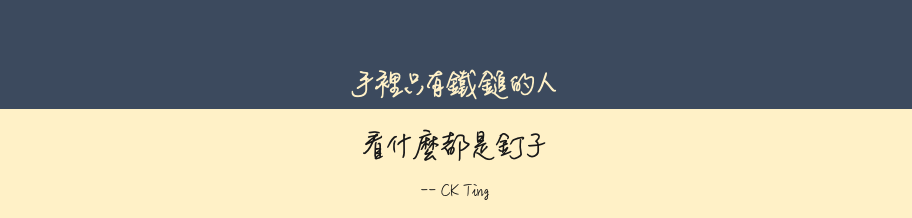
### Instruction

Instuctor: Winnie YH Zhao 
  
Welcome to NEAF DIP workshop! :)  
Here we prepare some widely used methods to let you practice, including:
1. Histogram Equalization
2. Mean blur, Median blur, Gaussian blur
3. Binary
4. HSV filter
5. Morphological: erosion, dilation, open, close
6. Find contours

Those skills are very powerful and important skills, please enjoy learning and put them into good use :)

# 1. Histogram Equalization
Histogram is the method to enhance image contrast.  
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.  
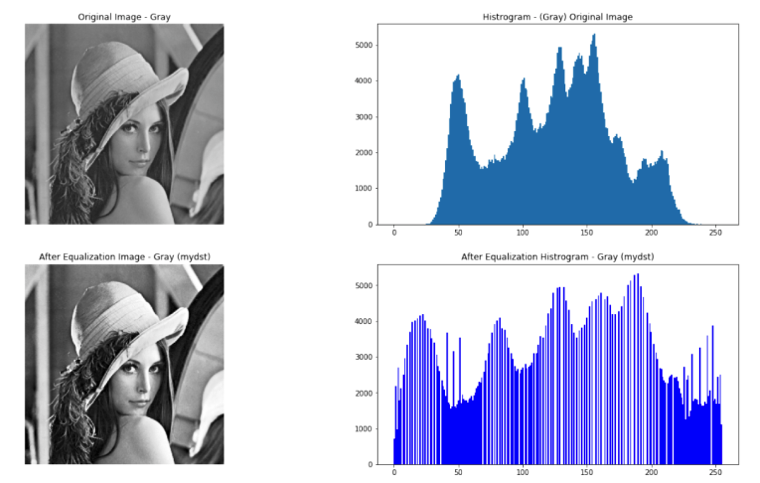

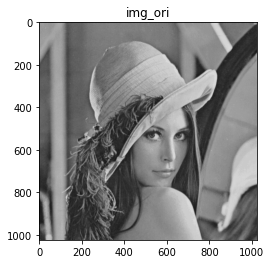

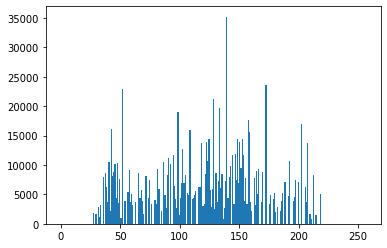

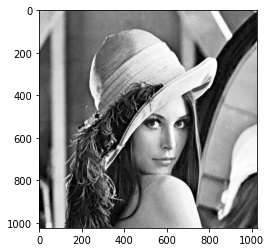

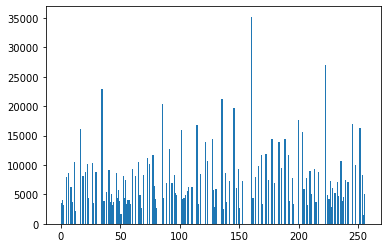

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class IMG():
    def __init__(self):
        self.img = []
    def add_image(self, image, im_title = None):
        self.img.append([image, im_title])
    def show_all_image(self, size = 10):
        a, b = len(self.img), 2
        long = a // b + a % b
        plt.figure(figsize=(size, size))
        
        for i in range(len(self.img)):
            plt.subplot(long,2,i+1)
            plt.imshow(cv2.cvtColor(self.img[i][0], cv2.COLOR_BGR2RGB))
            plt.title(self.img[i][1])


def show_image(image, im_str = None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(im_str)
    plt.show()

def show_hist(image):
    plt.hist(image.ravel(), 256, [0, 256])
    plt.show()
    
    
img_ori = cv2.imread('input/lena.bmp', cv2.IMREAD_GRAYSCALE) # Read image as gray.
show_image(img_ori, "img_ori")
show_hist(img_ori)


img_equa = cv2.equalizeHist(img_ori)
show_image(img_equa)
show_hist(img_equa)

# save figure
cv2.imwrite('output/img_ori.bmp', img_ori)
cv2.imwrite('output/img_equa.bmp', img_equa)
# cv2.imwrite('output/hist_ori.bmp', hist_ori)
# cv2.imwrite('output/hist_equa.bmp', hist_equa)


keywords: plt.hist, cv2.equalizeHist, cv2.calcHist

## 2. Mean blur, Gaussian blur, Median blur
Blur is a method to deal with the noise on the image.
Please input the image and use different kernel size to show blur result.
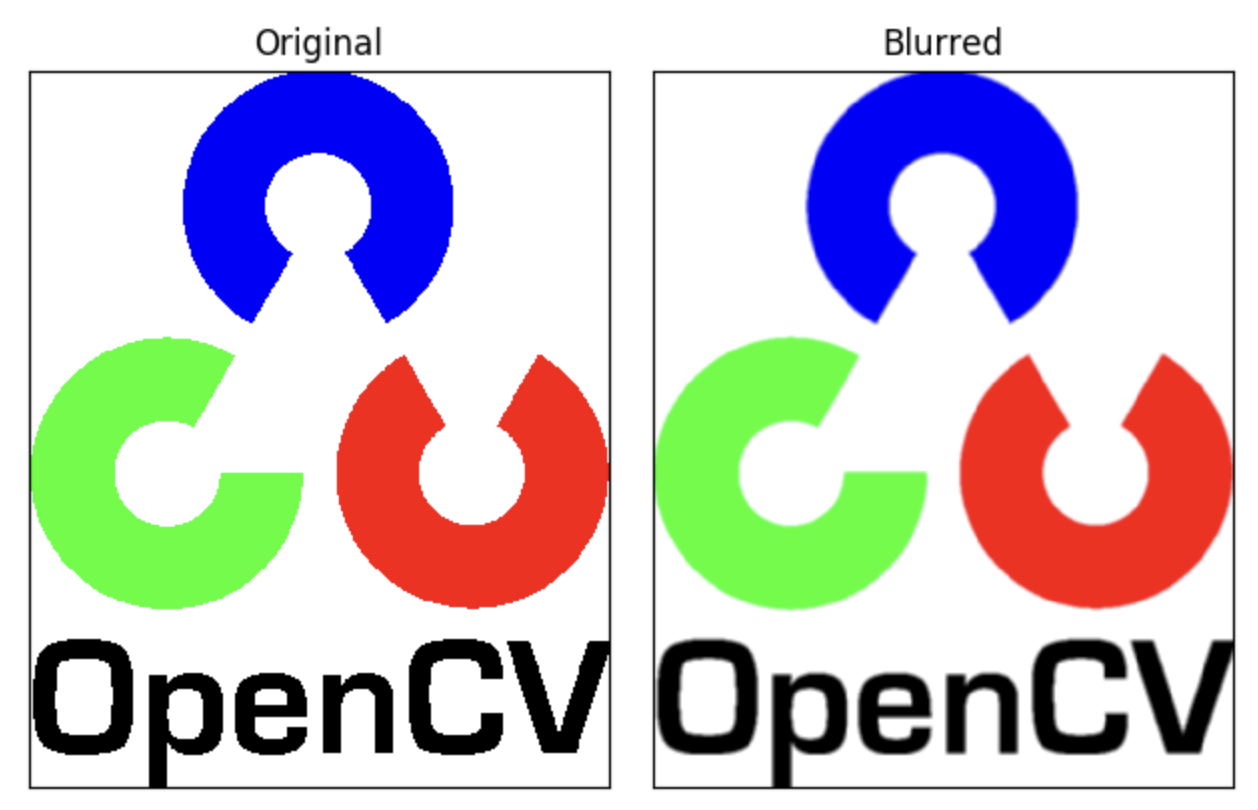
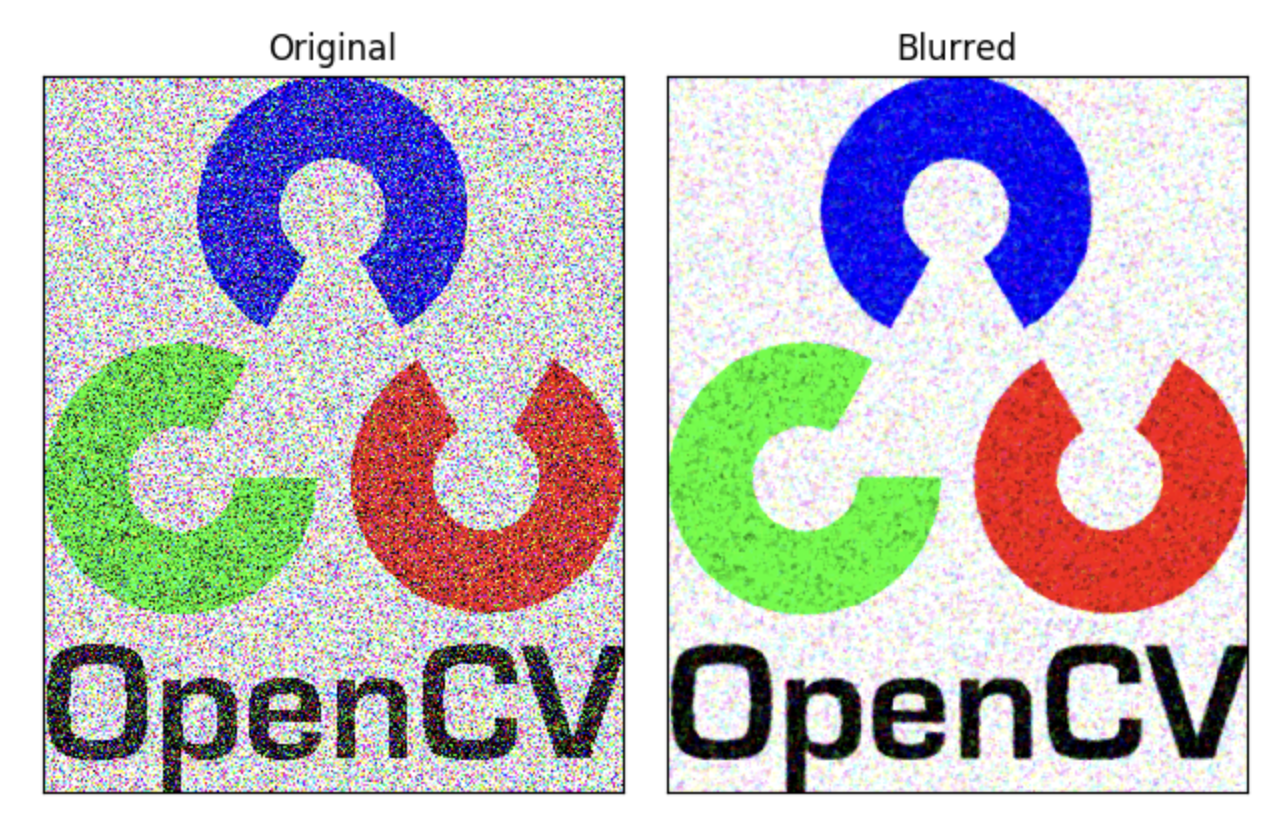

True

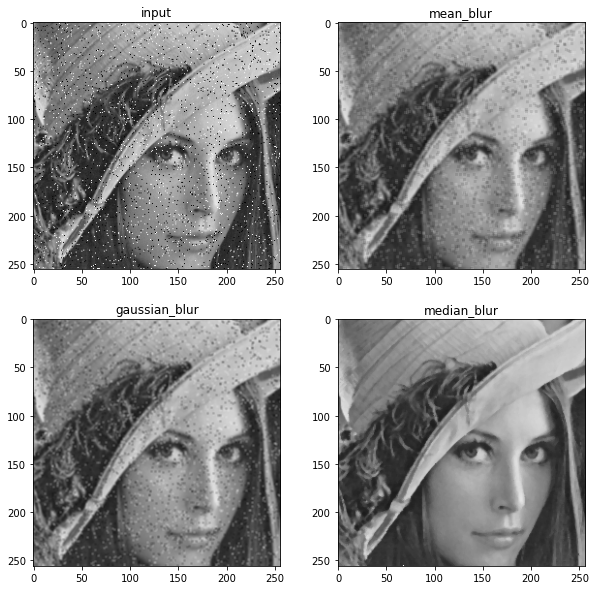

In [2]:
Blur = IMG()

img_noise = cv2.imread('input/lena_noise.png', cv2.IMREAD_GRAYSCALE)
Blur.add_image(img_noise, "input")

# Blur the image by three methods.
ksize = 3

img_mean_blur = cv2.blur(img_noise, (ksize, ksize))
Blur.add_image(img_mean_blur, "mean_blur")
# show_image(img_mean_blur)

img_gaussian_blur = cv2.GaussianBlur(img_noise, (ksize, ksize), 1)
Blur.add_image(img_gaussian_blur, "gaussian_blur")
# show_image(img_gaussian_blur)

img_median_blur = cv2.medianBlur(img_noise, ksize)
Blur.add_image(img_median_blur, "median_blur")
# show_image(img_median_blur)

Blur.show_all_image()

cv2.imwrite('output/img_mean_blur.png', img_mean_blur)
cv2.imwrite('output/img_gaussian_blur.png', img_gaussian_blur)
cv2.imwrite('output/img_median_blur.png', img_median_blur)

### Question:
1. What is the difference between three methods? When to use them?
    In this situation, the median is the best.
2. What is the difference if the kernel size changes?  
    The bigger the kernel size is, the fuzzier the image is.

keywords: cv2.blur, cv2.GaussianBlur, cv2.medianBlur

## 3. Binary
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  
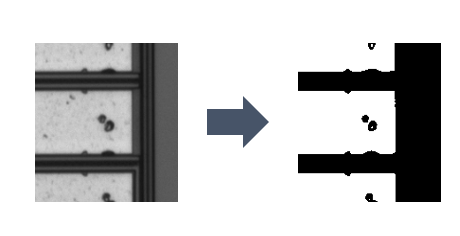

True

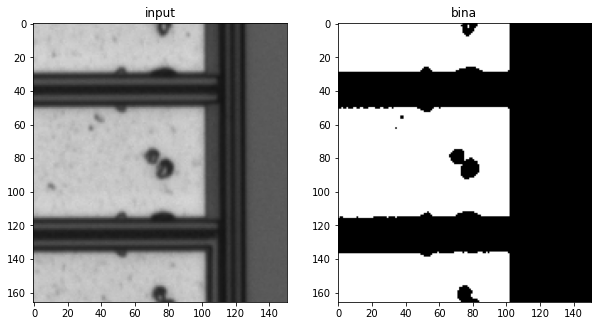

In [3]:
Bina = IMG()

pad_task1 = cv2.imread('input/pad_task1.bmp', cv2.IMREAD_GRAYSCALE)
Bina.add_image(pad_task1, "input")
# show_image(pad_task1)

# Do the image binary to seperate pad and background
ret, pad_task1_thres = cv2.threshold(pad_task1, 127, 255, cv2.THRESH_BINARY)
Bina.add_image(pad_task1_thres, "bina")
# show_image(pad_task1_thres)

Bina.show_all_image()

cv2.imwrite('output/pad_task1_thres.bmp', pad_task1_thres)

True

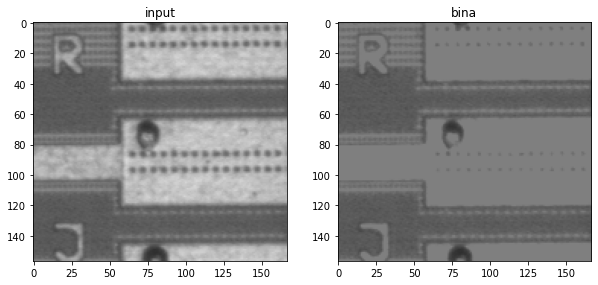

In [5]:
Bina2 = IMG()

pad_task2 = cv2.imread('input/pad_task2.bmp', cv2.IMREAD_GRAYSCALE)
Bina2.add_image(pad_task2, "input")
# show_image(pad_task2)

# Do the image binary to seperate pad and background
ret, pad_task2_thres = cv2.threshold(pad_task2, 127, 255, cv2.THRESH_TRUNC)
Bina2.add_image(pad_task2_thres, "bina")
# show_image(pad_task2_thres)

Bina2.show_all_image()

cv2.imwrite('output/pad_task2_thres.bmp', pad_task2_thres)

True

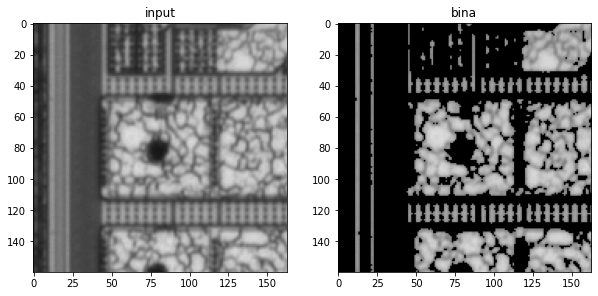

In [6]:
Bina3 = IMG()
pad_task3 = cv2.imread('input/pad_task3.bmp', cv2.IMREAD_GRAYSCALE)
Bina3.add_image(pad_task3, "input")
# show_image(pad_task3)

# Do the image binary to seperate pad and background
ret, pad_task3_thres = cv2.threshold(pad_task3, 127, 255, cv2.THRESH_TOZERO)
Bina3.add_image(pad_task3_thres, "bina")
# show_image(pad_task3_thres)

Bina3.show_all_image()

cv2.imwrite('output/pad_task3_thres.bmp', pad_task3_thres)

### Questions:
1. What are the limits of this methods?
2. What if the light source is not uniform? Is this method still work? How to improve it?  

keywords: cv2.threshold

## 4. HSV filter
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

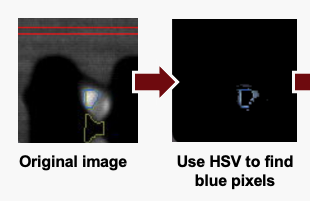
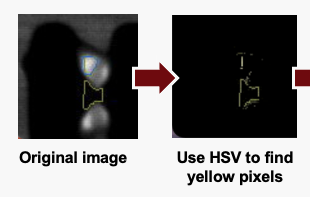

### Steps:
1. Transfer color to HSV.
2. Setting the color range and filter the image. (output the color image in the setting range)
3. Binary the image, find the left-top and right-bottom coordinate.
4. Crop the image by the coordinate.  

Noted: Blur, histogram equalization methods could be used if needed.  

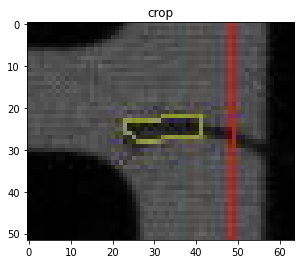

True

In [7]:
Yellow = IMG()

# Yellow box.
Fusheng_yellow = cv2.imread('input/Fusheng_yellow.jpg')
Yellow.add_image(Fusheng_yellow, "input")

# Step 1. Transfer color to HSV
Fusheng_yellow_HSV = cv2.cvtColor(Fusheng_yellow, cv2.COLOR_BGR2HSV)
Yellow.add_image(Fusheng_yellow_HSV, "HSV")

# Step 2. Setting the color range and filter the image.

lower = np.array([22,30,30])
upper = np.array([45,255,255])
mask = cv2.inRange(Fusheng_yellow_HSV, lower, upper)
Yellow.add_image(mask, "mask")

# set my output img to zero everywhere except my mask
# output_img = Fusheng_yellow.copy()
# output_img[np.where(mask == 0)] = 0


# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).

mask_blur = cv2.medianBlur(mask, 3)

coord = cv2.findNonZero(mask_blur)
coord = np.reshape(coord, (len(coord), -1))

x, y = np.nanmin(coord, axis = 0)
x_max, y_max = np.nanmax(coord, axis = 0)
w, h = x_max - x, y_max - y

# Step 4. Crop the image by the coordinate.

image = Fusheng_yellow.copy()
crop_edge = 20                                                                   # surrounding 20 pixels 
cropimg_yellow = image[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.
Yellow.add_image(cropimg_yellow, "crop")
show_image(cropimg_yellow, "crop")

# Yellow.show_all_image(13)

cv2.imwrite('output/cropHSV_yellow.jpg', cropimg_yellow)




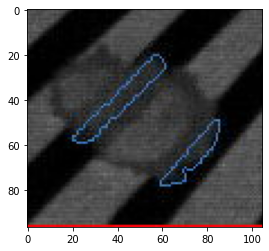

True

In [96]:
Blue = IMG()
# Blue box.
Fusheng_blue = cv2.imread('input/Fusheng_blue.jpg')
Blue.add_image(Fusheng_blue, "input")

# Step 1. Transfer color to HSV
Fusheng_blue_HSV = cv2.cvtColor(Fusheng_blue, cv2.COLOR_BGR2HSV)
Blue.add_image(Fusheng_blue_HSV, "HSV")

# Step 2. Setting the color range and filter the image.

lower = np.array([100,50,50])
upper = np.array([130,255,255])
mask = cv2.inRange(Fusheng_blue_HSV, lower, upper)
Blue.add_image(mask, "mask")

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).

mask_blur = cv2.medianBlur(mask, 3)

coord = cv2.findNonZero(mask_blur)
coord = np.reshape(coord, (len(coord), -1))

x, y = np.nanmin(coord, axis = 0)
x_max, y_max = np.nanmax(coord, axis = 0)
w, h = x_max - x, y_max - y

# Step 4. Crop the image by the coordinate.

image = Fusheng_blue.copy()
crop_edge = 20                                                                 # surrounding 20 pixels 
cropimg_blue = image[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.
Blue.add_image(cropimg_blue, "crop")
show_image(cropimg_blue)

# Blue.show_all_image(13)

cv2.imwrite('output/cropHSV_blue.jpg', cropimg_blue)

## 5. Morphological: erosion, dilation, open, close

Those methods help to denoise, enhance the features.   
Purpose: Use this methods to fill up the lines.
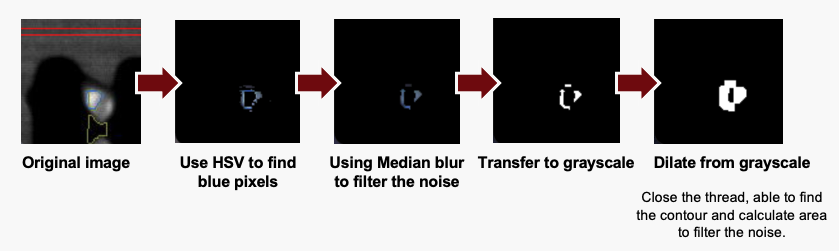

True

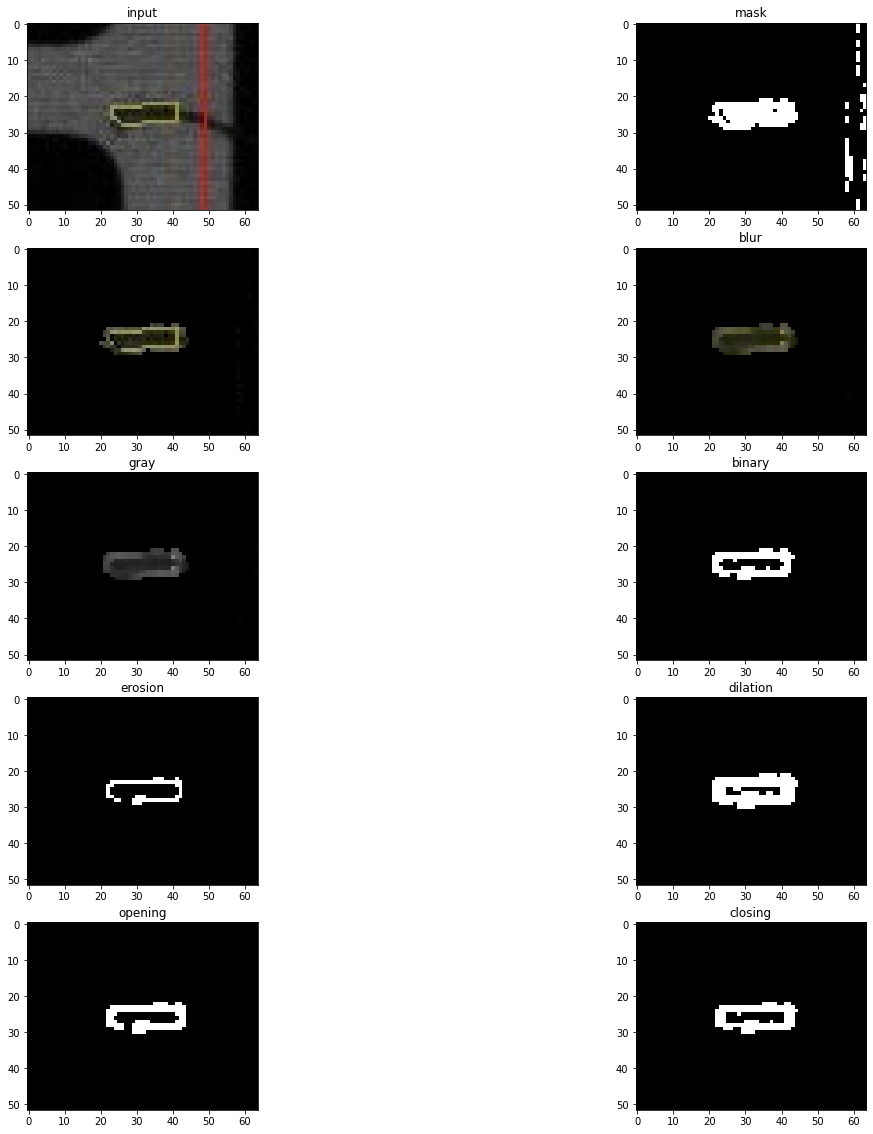

In [8]:
MYellow = IMG()

hsv_yellow = cv2.imread('output/cropHSV_yellow.jpg')
MYellow.add_image(hsv_yellow, 'input')
# show_image(hsv_yellow, 'origin')

Fusheng_yellow_HSV = cv2.cvtColor(hsv_yellow, cv2.COLOR_BGR2HSV)

# Try to use erosion, dilation, open, close to fill up the lines.
lower = np.array([22,40,0])
upper = np.array([45,255,255])
mask = cv2.inRange(Fusheng_yellow_HSV, lower, upper)
MYellow.add_image(mask, 'mask')
# show_image(mask, 'mask')

output_img = hsv_yellow.copy()
output_img[np.where(mask == 0)] = 0
MYellow.add_image(output_img, 'crop')
# show_image(output_img, 'crop')

output_img = cv2.medianBlur(output_img, 3)
MYellow.add_image(output_img, 'blur')
# show_image(output_img, 'blur')

gray = cv2.cvtColor(output_img, cv2.COLOR_BGR2GRAY)
ret, bina = cv2.threshold(gray, 40, 255, cv2.THRESH_BINARY)
MYellow.add_image(gray, 'gray')
MYellow.add_image(bina, 'binary')
# show_image(gray, 'gray')
# show_image(bina, 'binary')

kernel = np.ones((2, 2), np.uint8)
erosion = cv2.erode(bina, kernel, iterations = 1)
MYellow.add_image(erosion, 'erosion')
# show_image(erosion, 'erosion')

dilation = cv2.dilate(bina, kernel, iterations = 1)
MYellow.add_image(dilation, 'dilation')
# show_image(dilation, 'dilation')

opening = cv2.morphologyEx(bina, cv2.MORPH_OPEN, kernel)
MYellow.add_image(opening, 'opening')
# show_image(opening, 'opening')

closing = cv2.morphologyEx(bina, cv2.MORPH_CLOSE, kernel)
MYellow.add_image(closing, 'closing')
# show_image(closing, 'closing')

MYellow.show_all_image(20)

cv2.imwrite('output/morpho_yellow.jpg', bina)


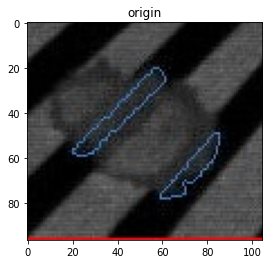

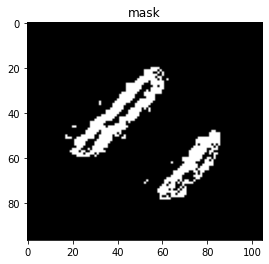

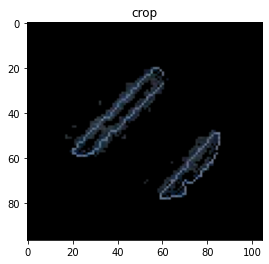

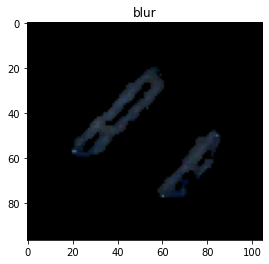

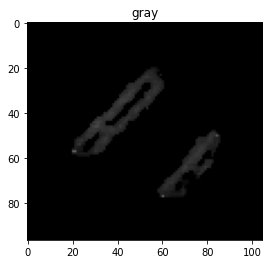

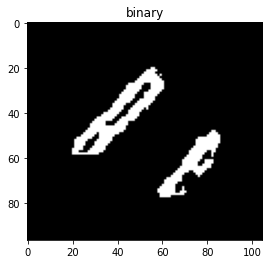

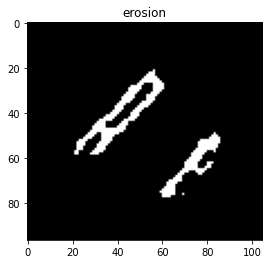

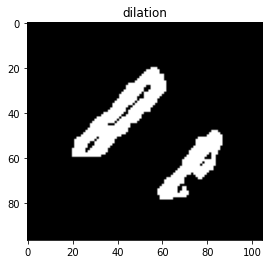

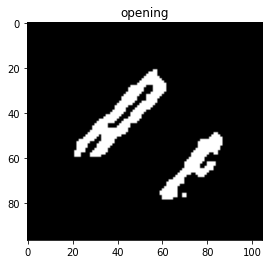

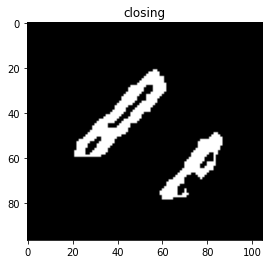

True

In [9]:
MYellow = IMG()

hsv_blue = cv2.imread('output/cropHSV_blue.jpg')
show_image(hsv_blue, 'origin')

Fusheng_blue_HSV = cv2.cvtColor(hsv_blue, cv2.COLOR_BGR2HSV)

# Try to use erosion, dilation, open, close to fill up the lines.
lower = np.array([90,40,40])
upper = np.array([130,255,255])
mask = cv2.inRange(Fusheng_blue_HSV, lower, upper)
show_image(mask, 'mask')

output_img = hsv_blue.copy()
output_img[np.where(mask == 0)] = 0
show_image(output_img, 'crop')

output_img = cv2.medianBlur(output_img, 3)
show_image(output_img, 'blur')

gray = cv2.cvtColor(output_img, cv2.COLOR_BGR2GRAY)
ret, bina = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)
show_image(gray, 'gray')
show_image(bina, 'binary')

kernel = np.ones((2, 2), np.uint8)
erosion = cv2.erode(bina, kernel, iterations = 1)
show_image(erosion, 'erosion')

dilation = cv2.dilate(bina, kernel, iterations = 1)
show_image(dilation, 'dilation')

opening = cv2.morphologyEx(bina, cv2.MORPH_OPEN, kernel)
show_image(opening, 'opening')

closing = cv2.morphologyEx(bina, cv2.MORPH_CLOSE, kernel)
show_image(closing, 'closing')

cv2.imwrite('output/morpho_blue.jpg', bina)


keywords: cv2.erode, cv2.dilate, cv2.morpholopyEx

## 6. Find countours

Use package to find the contours in the image.
Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.
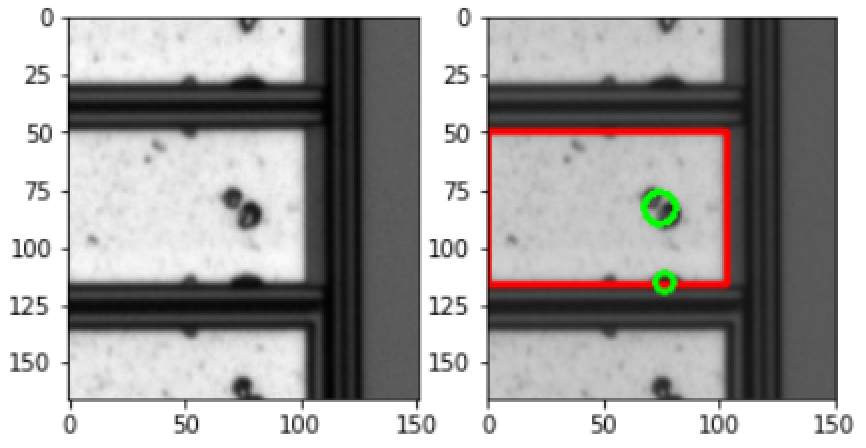

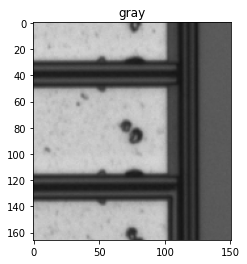

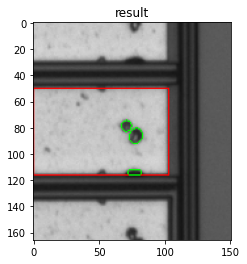

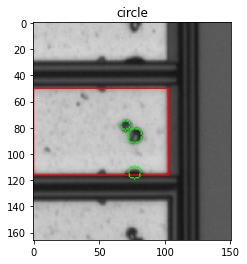

The pad area is  6545.0
The probe mark area is  178.0


In [2]:
pad_task1 = cv2.imread('input/pad_task1.bmp')
clone_image = pad_task1.copy()

gray = cv2.cvtColor(pad_task1, cv2.COLOR_BGR2GRAY)
show_image(gray, 'gray')

# binary and blur
ret, bina = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
# show_image(bina, 'bina')

bina_blur = cv2.medianBlur(bina, 3)
# show_image(bina_blur, 'bina_blur')

# find outside contours
contours, _ = cv2.findContours(bina_blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# choose contours[1] and find the coordinates
(x, y, w, h) = cv2.boundingRect(contours[1])
cv2.rectangle(clone_image, (x, y), (x + w, y + h), (0, 0, 255), 1)
# show_image(clone_image, 'clone_image')

pad_area = cv2.contourArea(contours[1])

# make mask
mask = np.zeros(gray.shape, dtype = 'uint8')
mask[y : y + h, x : x + w] = 255

masked = cv2.bitwise_and(bina_blur, bina_blur, mask = mask)

mask_inv = cv2.bitwise_not(mask)
masked = mask_inv + masked
# show_image(masked, 'masked')

# blur again and clean the middle part
blurr = cv2.medianBlur(masked, 5)
# show_image(blurr, 'blurr')

# find inside contours
contours, _ = cv2.findContours(blurr, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

cnts = contours[0:3]  # 0, 1, 2

img = cv2.drawContours(clone_image.copy(), cnts, -1, (0,255,0), 1)
show_image(img, 'result')


probemark_area = 0

for c in cnts:
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(clone_image, (int(x), int(y)), int(radius), (0, 255, 0), 1)
    probemark_area += cv2.contourArea(c)

show_image(clone_image, 'circle') 


# Find the pad and probemark contours and draw.

cv2.imwrite('output/pad_task1_cont.bmp', img)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

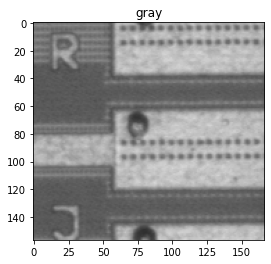

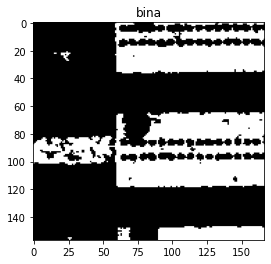

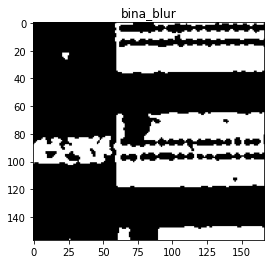

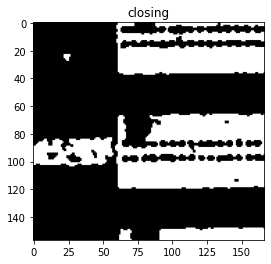

3 4881.0


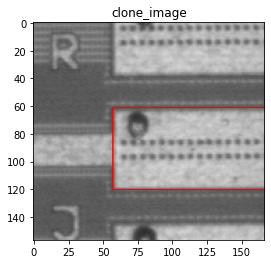

In [39]:
pad_task2 = cv2.imread('input/pad_task2.bmp')
clone_image = pad_task2.copy()

gray = cv2.cvtColor(pad_task2, cv2.COLOR_BGR2GRAY)
show_image(gray, 'gray')

# binary and blur
ret, bina = cv2.threshold(gray, 168, 255, cv2.THRESH_BINARY)
show_image(bina, 'bina')

bina_blur = cv2.medianBlur(bina, 3)
show_image(bina_blur, 'bina_blur')

kernel = np.ones((2, 2), np.uint8)
closing = cv2.morphologyEx(bina_blur, cv2.MORPH_CLOSE, kernel)
show_image(closing, 'closing')

# # find outside contours
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# img = cv2.drawContours(clone_image.copy(), contours, -1, (0,255,0), 1)
# show_image(img, 'result')

area = [0] * len(contours)


for i in range(len(contours)):
    area[i] = cv2.contourArea(contours[i])

# print(max(area))
print(area.index(max(area)), max(area))
    
i = area.index(max(area))

# # choose contours[1] and find the coordinates
(x, y, w, h) = cv2.boundingRect(contours[i])
cv2.rectangle(clone_image, (x-2, y-5), (x + w, y + h), (0, 0, 255), 1)
show_image(clone_image, 'clone_image')

# pad_area = cv2.contourArea(contours[1])

# # make mask
# mask = np.zeros(gray.shape, dtype = 'uint8')
# mask[y : y + h, x : x + w] = 255

# masked = cv2.bitwise_and(bina_blur, bina_blur, mask = mask)

# mask_inv = cv2.bitwise_not(mask)
# masked = mask_inv + masked
# # show_image(masked, 'masked')

# # blur again and clean the middle part
# blurr = cv2.medianBlur(masked, 5)
# # show_image(blurr, 'blurr')

# # find inside contours
# contours, _ = cv2.findContours(blurr, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# cnts = contours[0:3]  # 0, 1, 2

# img = cv2.drawContours(clone_image.copy(), cnts, -1, (0,255,0), 1)
# show_image(img, 'result')


# probemark_area = 0

# for c in cnts:
#     ((x, y), radius) = cv2.minEnclosingCircle(c)
#     cv2.circle(clone_image, (int(x), int(y)), int(radius), (0, 255, 0), 1)
#     probemark_area += cv2.contourArea(c)

# show_image(clone_image, 'circle') 


# # Find the pad and probemark contours and draw.

# cv2.imwrite('output/pad_task1_cont.bmp', img)
# print('The pad area is ', pad_area)
# print('The probe mark area is ', probemark_area)



# Find the pad and probemark contours and draw.

# cv2.imwrite('output/pad_task2_cont.bmp', result)
# print('The pad area is ', pad_area)
# print('The probe mark area is ', probemark_area)

In [11]:
pad_task3 = cv2.imread('input/pad_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Find the pad and probemark contours and draw.

cv2.imwrite('output/pad_task3_cont.bmp', result)
print('The pad area is ', pad_area)
print('The probe mark area is ', probemark_area)

NameError: name 'result' is not defined

keywords:  
cv2.findContours, cv2.contourArea